# Bitcoin Analytics Example

**Objective:**
Demonstrate end-to-end Bitcoin analytics workflows using the `bitcoin_analytics_utils` module.
This example covers:
1. Fetching historical price data
2. Computing technical indicators (Moving Averages, RSI, Bollinger Bands)
3. Plotting results
4. Streaming real-time price data
5. Saving outputs for downstream use

In [26]:
! pip install python-dotenv requests pandas sqlalchemy psycopg2-binary statsmodels matplotlib


## 1. Imports and Configuration

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

from bitcoin_analytics_utils import (
    update_minute_table,
    update_daily_table,
    load_daily_from_db,
    compute_macd,
    compute_bollinger_bands,
    compute_rsi,
    fit_sarimax,
    forecast_sarimax
)

In [28]:
from bitcoin_analytics_utils import (
    update_minute_table,
    update_daily_table,
    load_daily_from_db,
    compute_macd,
    compute_bollinger_bands,
    compute_rsi,
    fit_sarimax,
    forecast_sarimax
)

## 2. Update Local Database

In [29]:
# Ensure tables exist and are up-to-date
print("Updating minute-level table...")
update_minute_table()
print("Updating daily-level table...")
update_daily_table()


Updating minute-level table...
Updating daily-level table...


## 3. Load Data

In [30]:
# Load the daily closing price series
daily_series = load_daily_from_db()
print(f"Loaded {len(daily_series)} daily data points.")

# Load minute-level data for real-time plotting
from bitcoin_analytics_utils import fetch_realtime_minutes
minute_df = fetch_realtime_minutes()
print(f"Loaded {len(minute_df)} minutes of real-time data.")

Loaded 1828 daily data points.
Loaded 1441 minutes of real-time data.


## 4. Compute Technical Indicators

In [31]:
# Compute MACD
macd_df = compute_macd(daily_series.to_frame(name='price_usd'))

# Compute Bollinger Bands
bb_df = compute_bollinger_bands(daily_series.to_frame(name='price_usd'))

# Compute RSI
rsi_series = compute_rsi(daily_series.to_frame(name='price_usd'))

## 5. Plot Price with Indicators

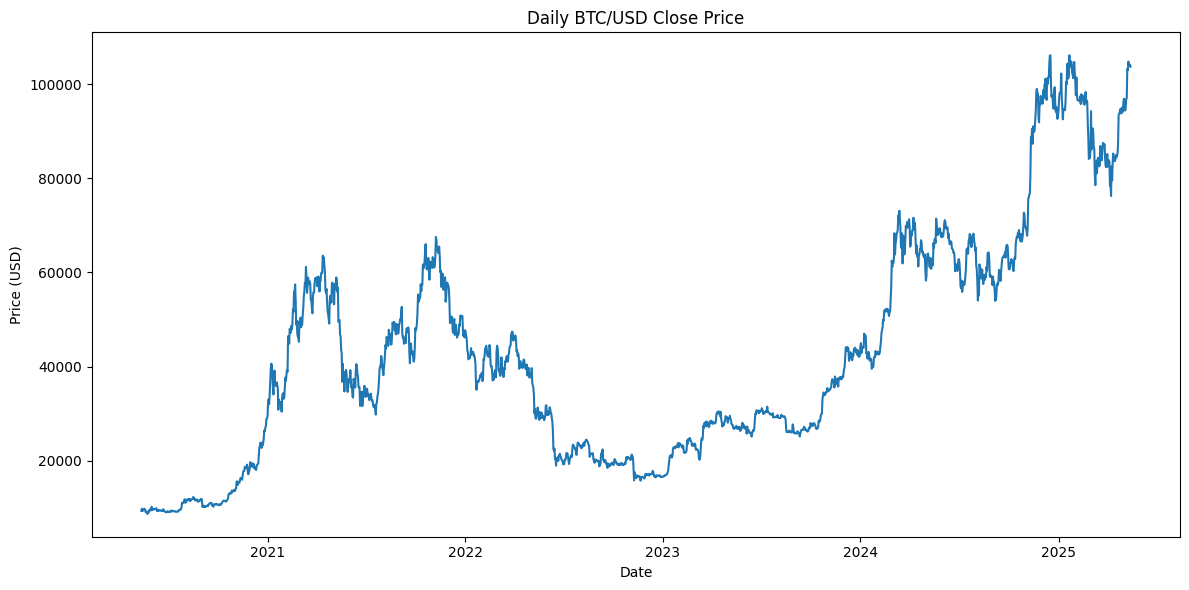

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(daily_series.index, daily_series.values)
plt.title("Daily BTC/USD Close Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

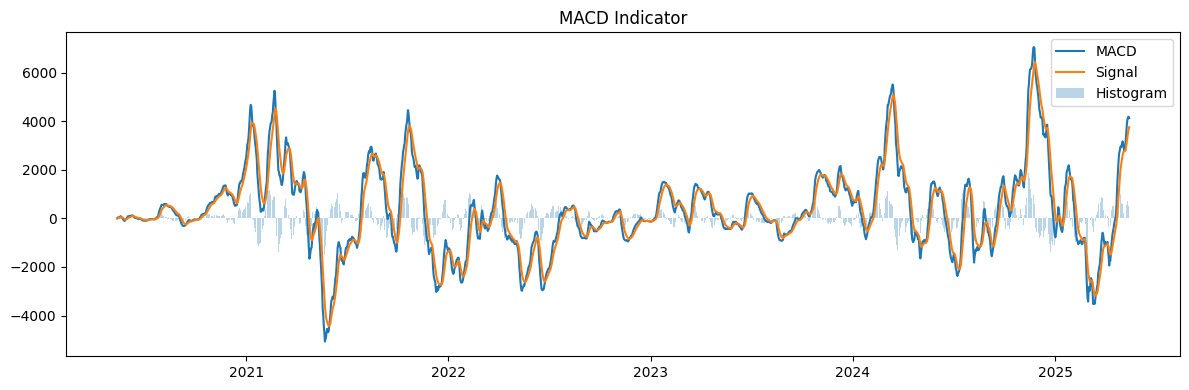

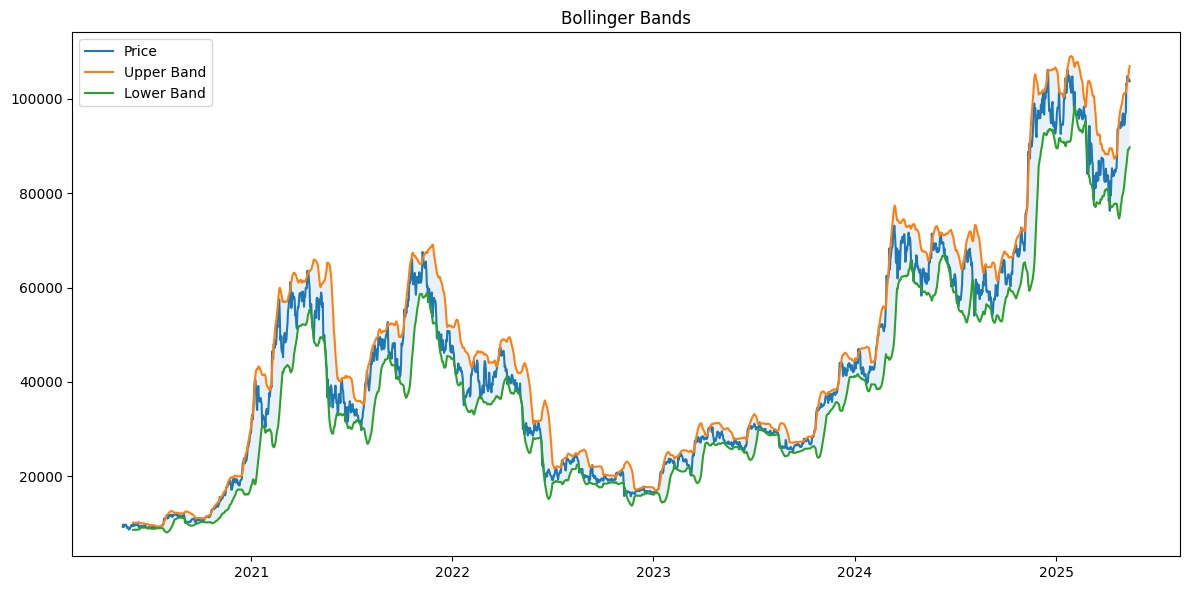

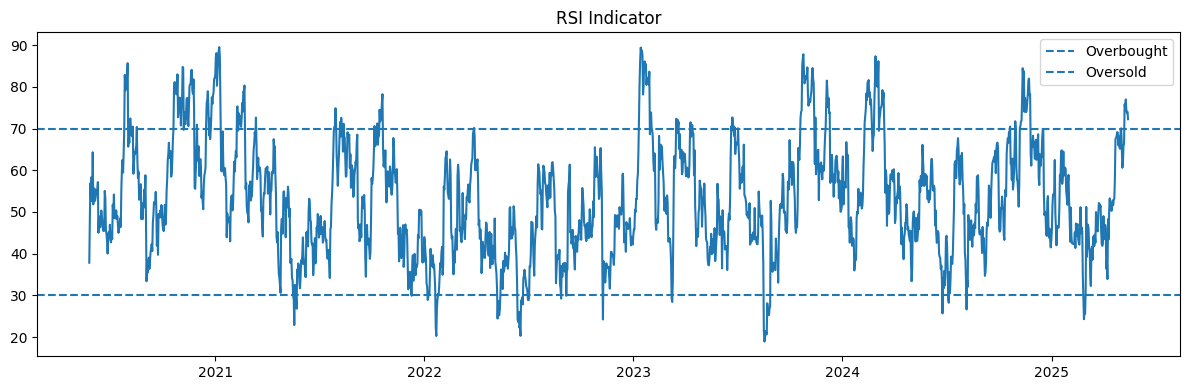

In [33]:
# MACD Plot
plt.figure(figsize=(12, 4))
plt.plot(macd_df.index, macd_df['macd'], label='MACD')
plt.plot(macd_df.index, macd_df['signal'], label='Signal')
plt.bar(macd_df.index, macd_df['histogram'], alpha=0.3, label='Histogram')
plt.legend()
plt.title("MACD Indicator")
plt.tight_layout()
plt.show()

# Bollinger Bands Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_series.index, daily_series.values, label='Price')
plt.plot(bb_df.index, bb_df['bb_upper'], label='Upper Band')
plt.plot(bb_df.index, bb_df['bb_lower'], label='Lower Band')
plt.fill_between(bb_df.index, bb_df['bb_lower'], bb_df['bb_upper'], alpha=0.1)
plt.legend()
plt.title("Bollinger Bands")
plt.tight_layout()
plt.show()

# RSI Plot
plt.figure(figsize=(12, 4))
plt.plot(rsi_series.index, rsi_series.values)
plt.axhline(70, linestyle='--', label='Overbought')
plt.axhline(30, linestyle='--', label='Oversold')
plt.legend()
plt.title("RSI Indicator")
plt.tight_layout()
plt.show()


## 6. Forecasting with SARIMAX

In [34]:
# Fit model on daily closing prices
t_model = fit_sarimax(daily_series)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# Forecast the next 30 days

In [35]:
forecast_df = forecast_sarimax(t_model, steps=30)

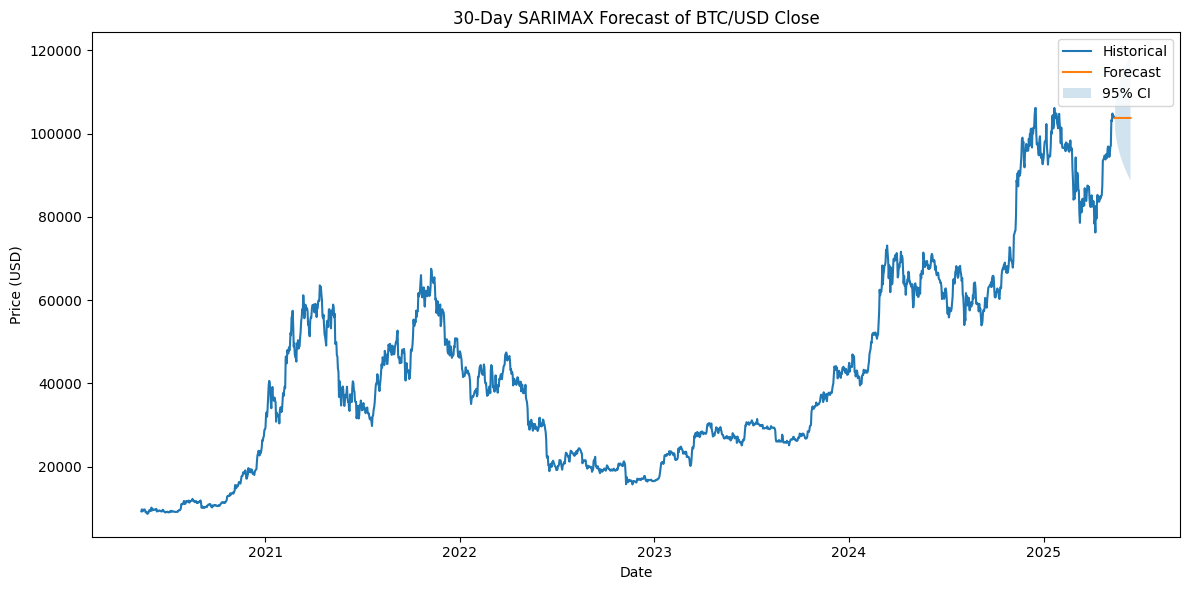

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(daily_series.index, daily_series.values, label='Historical')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast')
plt.fill_between(
    forecast_df.index,
    forecast_df['mean_ci_lower'],
    forecast_df['mean_ci_upper'],
    alpha=0.2,
    label='95% CI'
)
plt.legend()
plt.title("30-Day SARIMAX Forecast of BTC/USD Close")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

# 